# Proyecto 10

### Preparar Datos

0    7963
1    2037
Name: Exited, dtype: int64


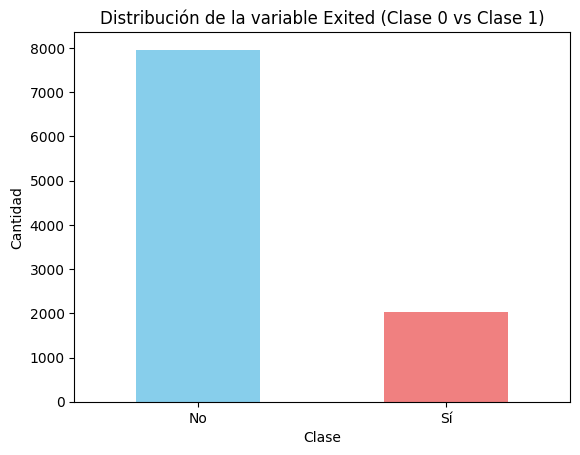

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve



df = pd.read_csv('/datasets/Churn.csv')

# Elimine columnas irrelevantes
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Separe características y objetivo
target = df['Exited']
features = df.drop('Exited', axis=1)

# Identifique las columnas numéricas y categóricas
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical = ['Geography', 'Gender']

# Dividimos los  datos
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=42)

# Preprocesamiento
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))])  # evitamos la trampa de variables ficticias

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric),
        ('cat', categorical_transformer, categorical)])

# Aplicamos transformaciones
features_train = preprocessor.fit_transform(features_train)
features_valid = preprocessor.transform(features_valid)

print(df['Exited'].value_counts())

# agregareun grafico para mejor visualizacion

df['Exited'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribución de la variable Exited (Clase 0 vs Clase 1)')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'], rotation=0)
plt.show()

### Examinar el equilibrio de clases

In [18]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Verifique equilibrio
print(target.value_counts(normalize=True))  # Comprobar desequilibrio de clases

# Entrenar modelo base
model = RandomForestClassifier(random_state=42)
model.fit(features_train, target_train)
preds = model.predict(features_valid)

# F1 Score
print("F1 base:", f1_score(target_valid, preds))




0    0.7963
1    0.2037
Name: Exited, dtype: float64
F1 base: 0.5505481120584652


### Mejora la calidad del modelo

In [19]:

model_weighted = RandomForestClassifier(random_state=42, class_weight='balanced')
model_weighted.fit(features_train, target_train)
preds_weighted = model_weighted.predict(features_valid)
print("F1 (con class_weight):", f1_score(target_valid, preds_weighted))

F1 (con class_weight): 0.5341772151898734


### Mejora la calidad del modelo

In [20]:

probabilities = model_weighted.predict_proba(features_valid)[:, 1]
print("AUC-ROC:", roc_auc_score(target_valid, probabilities))

AUC-ROC: 0.8426781357139341


Lo que descubri de la investigacion del ejercicio es:

Primero era el objetivo del modelo que es predecir si los clientes abandonarán el banco, basado en diversas características del cliente. Sin embargo, el conjunto de datos está desequilibrado, lo que significa que la mayoría de los clientes no abandonan, lo que podría dificultar que el modelo aprenda a predecir correctamente a aquellos que abandonan.

F1 Score: F1 de 0.55, lo que sugiere que el modelo no maneja bien el desequilibrio de clases.

Modelo con ponderación de clases: F1 de 0.53, con un desempeño ligeramente inferior al modelo base, lo que indica que la ponderación no fue suficiente para mejorar significativamente el rendimiento.

Impacto de la ponderación de clases: La técnica de class_weight='balanced' no tuvo un impacto fuerte, lo que sugiere que el modelo podría requerir ajustes adicionales en parámetros o cambiar de algoritmo para mejorar su desempeño.

El modelo necesita mejorar, especialmente en la clasificación de la clase minoritaria (clientes que abandonan el banco).
